In [1]:
# for Manipulation 
import numpy as np
import pandas as pd

# For Visulaization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# For interactivity
from ipywidgets import interact

# For warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lets read the dataset
data = pd.read_csv('data.csv')

# lets check the shape of the dataset
print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


In [160]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [161]:
# Description of Data
# N- Amount of Nitrogen in soil
# P- Amount of Phosphorous in soil
# K- Amount of Potassium in soil
# temperature- temp in degree Celsius
# humidity-humidity in %
#ph - PH of Soil
# rainfall-rainfall in mm

In [162]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [163]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [164]:
print("Average Ratio of Nitrogen in soil :{0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in soil :{0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in soil :{0:.2f}".format(data['K'].mean()))
print("Average temperature in celsius :{0:.2f}".format(data['temperature'].mean()))
print("Average Humidity in % :{0:.2f}".format(data['humidity'].mean()))
print("Average PH value of soil :{0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm :{0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in soil :50.55
Average Ratio of Phosphorous in soil :53.36
Average Ratio of Potassium in soil :48.15
Average temperature in celsius :25.62
Average Humidity in % :71.48
Average PH value of soil :6.47
Average Rainfall in mm :103.46


In [165]:
def summary(crop):
    df=data[data['label']==crop.lower()]
    print("-"*75)
    print("stats for Nitrogen")
    print("Min Nitrogrn Required : ",df['N'].min())
    print("Avg Nitrogrn Required : ",df['N'].mean())
    print("Max Nitrogrn Required : ",df['N'].max())
    print("-"*75)
    print("stats for Phosphorous")
    print("Min Phosphorous Required : ",df['P'].min())
    print("Avg Phosphorous Required : ",df['P'].mean())
    print("Max Phosphorous Required : ",df['P'].max())
    print("-"*75)
    print("stats for Potassium")
    print("Min Potassium Required : ",df['K'].min())
    print("Avg Potassium Required : ",df['K'].mean())
    print("Max Potassium Required : ",df['K'].max())
    print("-"*75)
    print("stats for Temperature")
    print("Min Temperature Required : {0:.2f} ".format(df['temperature'].min()))
    print("mean Temperature Required : {0:.2f} ".format(df['temperature'].mean()))
    print("max Temperature Required : {0:.2f} ".format(df['temperature'].max()))
    print("-"*75)
    print("stats for Humidity")
    print("Min Humidity Required : {0:.2f} ".format(df['humidity'].min()))
    print("mean Humidity Required : {0:.2f} ".format(df['humidity'].mean()))
    print("max Humidity Required : {0:.2f} ".format(df['humidity'].max()))
    print("-"*75)
    print("stats for PH")
    print("Min PH Required : {0:.2f} ".format(df['ph'].min()))
    print("mean PH Required : {0:.2f} ".format(df['ph'].mean()))
    print("max PH Required : {0:.2f} ".format(df['ph'].max()))
    print("-"*75)
    print("stats for Rainfall")
    print("Min Rainfall Required : {0:.2f} ".format(df['rainfall'].min()))
    print("mean Rainfall Required : {0:.2f} ".format(df['rainfall'].mean()))
    print("max Rainfall Required : {0:.2f} ".format(df['rainfall'].max()))
    

In [166]:
print('Crops : ',data['label'].unique())
crop=input("\nEnter the crop to Analyze : ")
if(crop.lower() in data['label'].unique()):
    summary(crop)
else:
    print("Enter Valid Crop")


Crops :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Enter the crop to Analyze : rice
---------------------------------------------------------------------------
stats for Nitrogen
Min Nitrogrn Required :  60
Avg Nitrogrn Required :  79.89
Max Nitrogrn Required :  99
---------------------------------------------------------------------------
stats for Phosphorous
Min Phosphorous Required :  35
Avg Phosphorous Required :  47.58
Max Phosphorous Required :  60
---------------------------------------------------------------------------
stats for Potassium
Min Potassium Required :  35
Avg Potassium Required :  39.87
Max Potassium Required :  45
---------------------------------------------------------------------------
stats for Temperature
Min Temperature Required : 20.05 
mean Temperature Required : 23.69 


In [167]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [168]:
def condn(condition):
    print("-"*75)
    print("Avg Requirement of ",condition,"by each crop".format())
    for i in data['label'].unique() :
        print(i," {0:.2f}".format(data[data['label']==i][condition].mean()))

In [169]:
print(" Conditons : ",np.array(data.columns)[:-1])
condition=input("Enter Condition to analyze ")
condn(condition)

 Conditons :  ['N' 'P' 'K' 'temperature' 'humidity' 'ph' 'rainfall']
Enter Condition to analyze N
---------------------------------------------------------------------------
Avg Requirement of  N by each crop
rice  79.89
maize  77.76
chickpea  40.09
kidneybeans  20.75
pigeonpeas  20.73
mothbeans  21.44
mungbean  20.99
blackgram  40.02
lentil  18.77
pomegranate  18.87
banana  100.23
mango  20.07
grapes  23.18
watermelon  99.42
muskmelon  100.32
apple  20.80
orange  19.58
papaya  49.88
coconut  21.98
cotton  117.77
jute  78.40
coffee  101.20


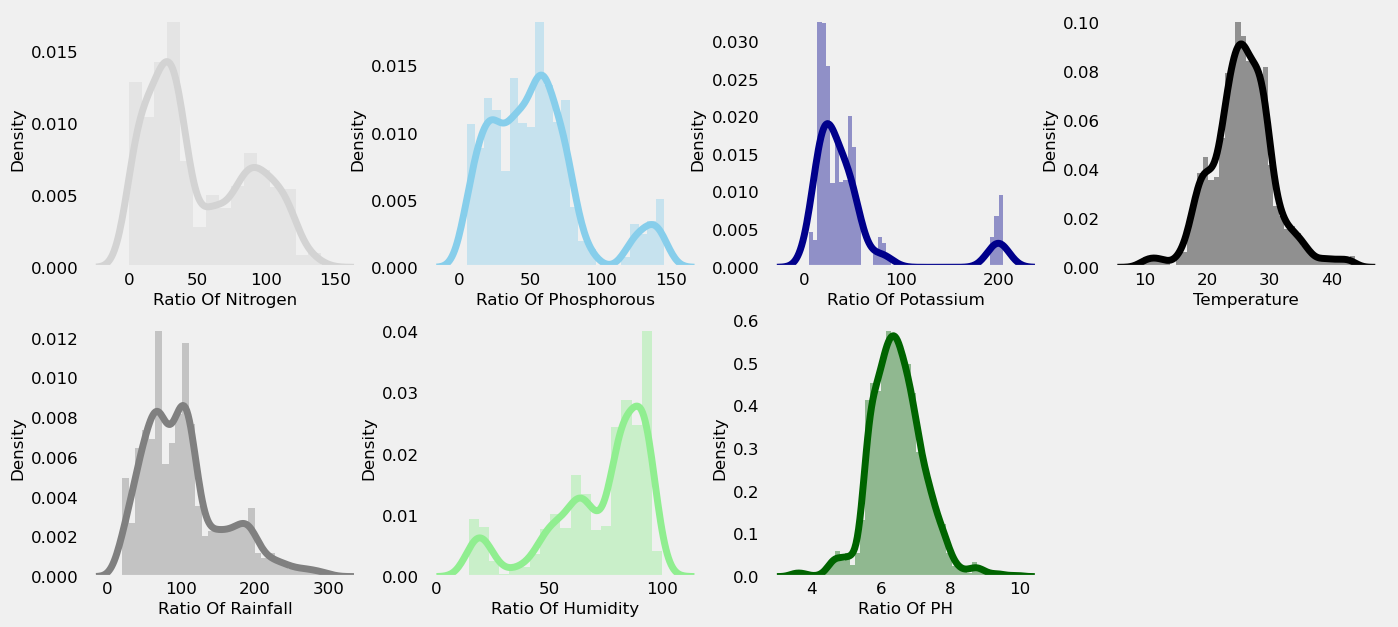

In [170]:
plt.rcParams['figure.figsize']=(15,7)
plt.rcParams['font.size']=12
plt.rcParams['lines.linewidth'] = 5

plt.subplot(2,4,1)
sns.distplot(data['N'],color='lightgrey')
plt.xlabel('Ratio Of Nitrogen')
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'],color='skyblue')
plt.xlabel('Ratio Of Phosphorous')
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'],color='darkblue')
plt.xlabel('Ratio Of Potassium')
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'],color='black')
plt.xlabel('Temperature')
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['rainfall'],color='grey')
plt.xlabel('Ratio Of Rainfall')
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['humidity'],color='lightgreen')
plt.xlabel('Ratio Of Humidity')
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['ph'],color='darkgreen')
plt.xlabel('Ratio Of PH')
plt.grid()

In [171]:
print("Summer Crops :")
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print("Rainy Crops :")
print(data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())
print("Winter Crops :")
print(data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())

Summer Crops :
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Rainy Crops :
['rice' 'papaya' 'coconut']
Winter Crops :
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


## Clustering similar crops


In [172]:
x=data.iloc[:,:-1].values
print(x.shape)
x_data=pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


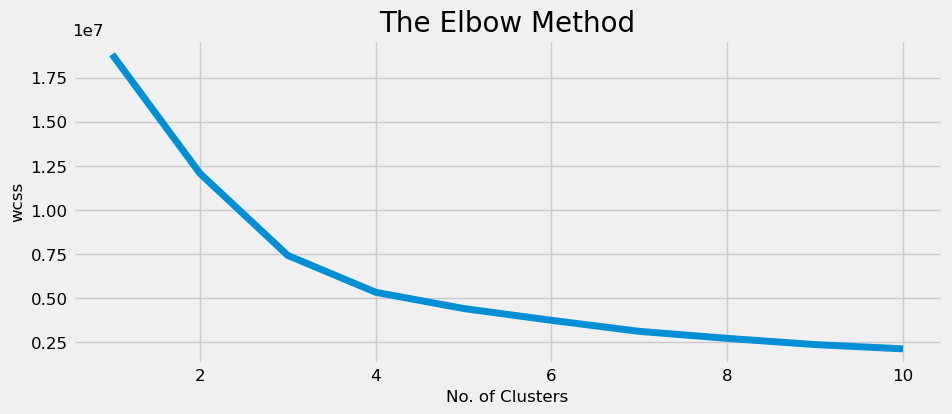

In [173]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize']=(10,4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()
    

In [174]:
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})

print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("crops in first Cluster",z[z['cluster']==0]['label'].unique())
print("-"*75)
print("crops in second Cluster",z[z['cluster']==1]['label'].unique())
print("-"*75)
print("crops in third Cluster",z[z['cluster']==2]['label'].unique())
print("-"*75)
print("crops in fourth Cluster",z[z['cluster']==3]['label'].unique())


Lets check the Results After Applying the K Means Clustering Analysis 

crops in first Cluster ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------------------
crops in second Cluster ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------------------
crops in third Cluster ['grapes' 'apple']
---------------------------------------------------------------------------
crops in fourth Cluster ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [175]:
print("Results for hard Clustering")
print("-"*75)
counts=z[z['cluster']==0]['label'].value_counts()
d=z.loc[z['label'].isin(counts.index[counts>=50])]
d=d['label'].value_counts()
print("First Cluster ",list(d.index))
print("-"*75)
counts=z[z['cluster']==1]['label'].value_counts()
d=z.loc[z['label'].isin(counts.index[counts>=50])]
d=d['label'].value_counts()
print("Second Cluster ",list(d.index))
print("-"*75)
counts=z[z['cluster']==2]['label'].value_counts()
d=z.loc[z['label'].isin(counts.index[counts>=50])]
d=d['label'].value_counts()
print("Third CLuster ",list(d.index))
print("-"*75)
counts=z[z['cluster']==3]['label'].value_counts()
d=z.loc[z['label'].isin(counts.index[counts>=50])]
d=d['label'].value_counts()
print("Fourth CLuster ",list(d.index))


Results for hard Clustering
---------------------------------------------------------------------------
First Cluster  ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
---------------------------------------------------------------------------
Second Cluster  ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
---------------------------------------------------------------------------
Third CLuster  ['grapes', 'apple']
---------------------------------------------------------------------------
Fourth CLuster  ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


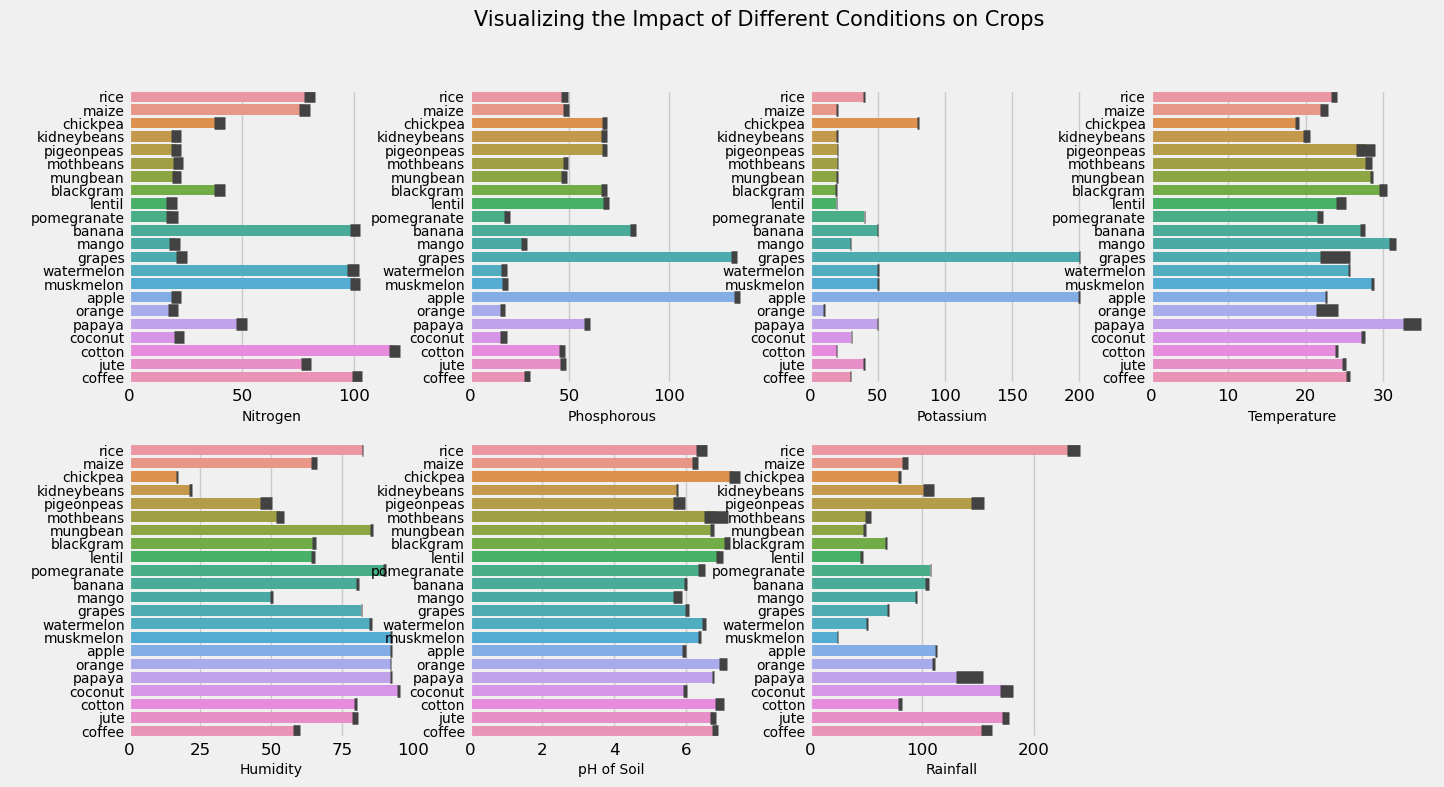

In [176]:
### Data Visualizations

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(x=data['N'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(x=data['P'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(x=data['K'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(x=data['temperature'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(x=data['humidity'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(x=data['ph'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(x=data['rainfall'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

In [177]:
y=data['label']
x=data.drop(['label'],axis=1)
print("x-",x.shape,"y-",y.shape)

x- (2200, 7) y- (2200,)


In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (1760, 7)
shape of y_train (1760,)
shape of x_test (440, 7)
shape of y_test (440,)


In [179]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred_log=log_model.predict(x_test)

In [180]:
score=log_model.score(x_test,y_test)
print("Accuracy is ", str(score))

Accuracy is  0.9681818181818181


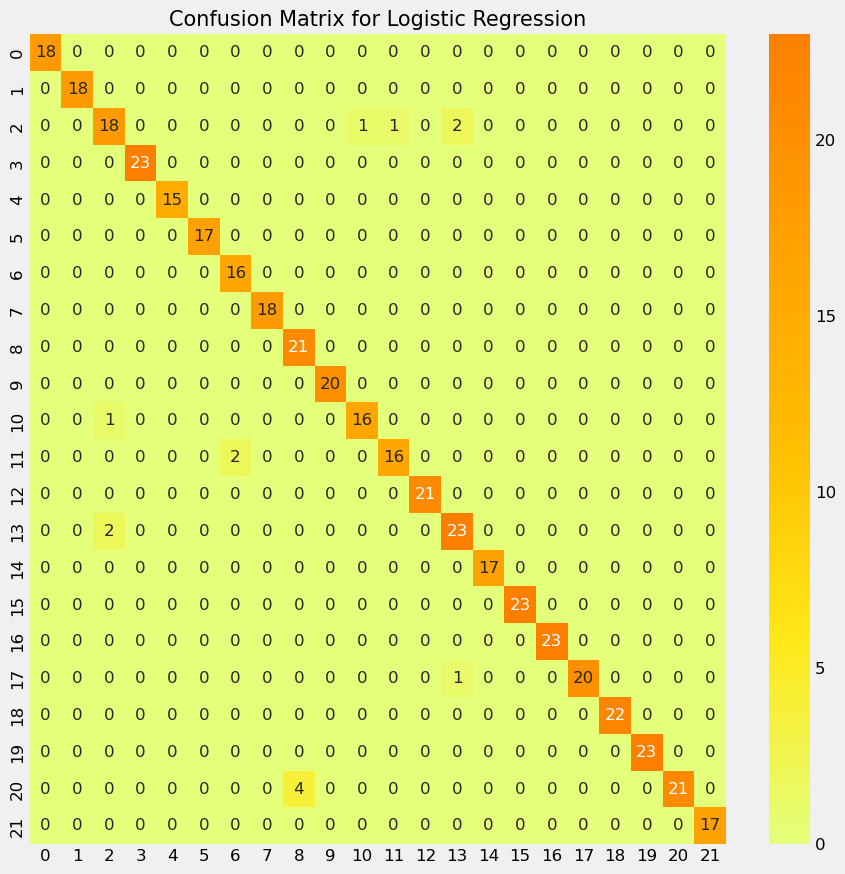

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [181]:
from sklearn.metrics import classification_report,confusion_matrix

plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred_log)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

# lets print the Classification Report also
cr = classification_report(y_test, y_pred_log)
print(cr)

In [182]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(criterion="entropy",splitter="best",max_features=7,max_depth=6)
dec_tree.fit(x_train,y_train)
y_pred_dec=dec_tree.predict(x_test)

In [183]:
score=dec_tree.score(x_test,y_test)
print("Accuracy is ",str(score))

Accuracy is  0.9795454545454545


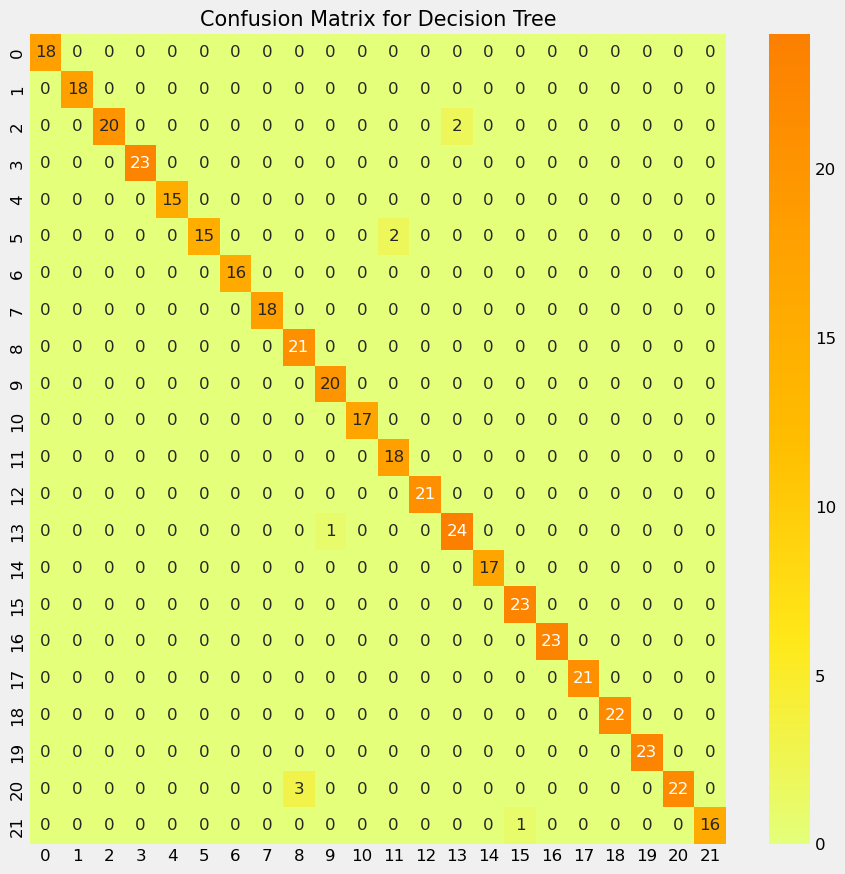

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.91      0.95        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      0.88      0.94        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        17
       maize       0.90      1.00      0.95        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.92      0.96      0.94        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       0.96      1.00      0.98        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [184]:
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred_dec)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Decision Tree', fontsize = 15)
plt.show()

# lets print the Classification Report also
cr = classification_report(y_test, y_pred_dec)
print(cr)

In [185]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)

In [186]:
score=svc.score(x_test,y_test)
print("Accuracy is ",str(score))

Accuracy is  0.9772727272727273


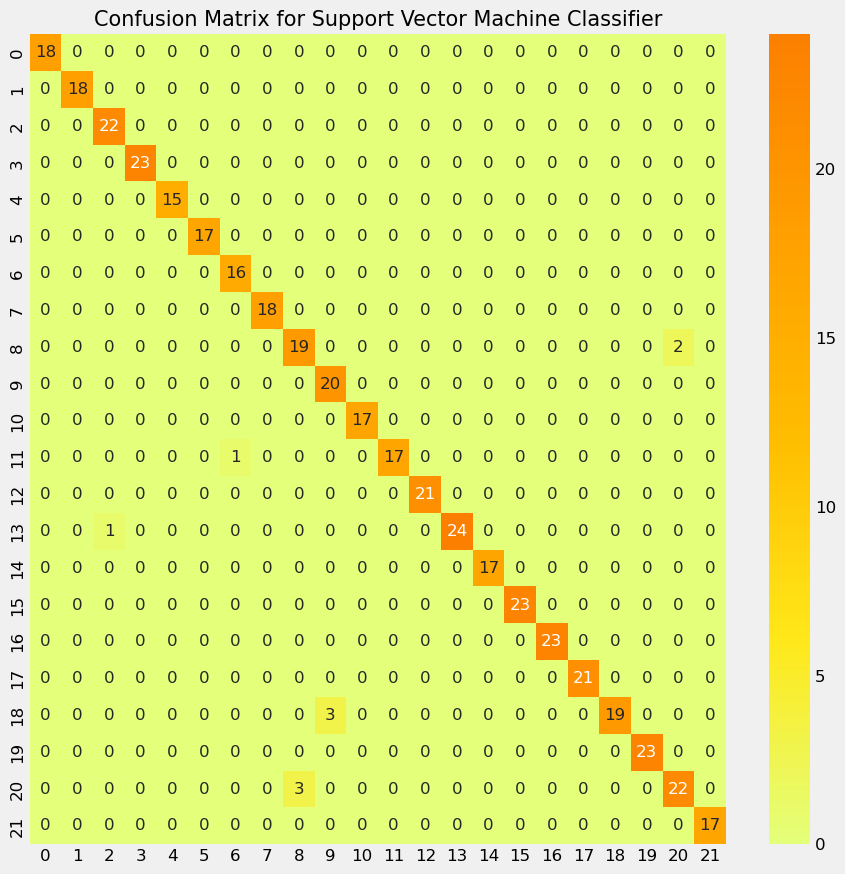

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.90      0.88        21
 kidneybeans       0.87      1.00      0.93        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [187]:
plt.rcParams["figure.figsize"]=(10,10)
cm=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(cm,annot=True,cmap="Wistia")
plt.title('Confusion Matrix for Support Vector Machine Classifier', fontsize = 15)
plt.show()

cr=classification_report(y_test,y_pred_svc)
print(cr)

In [188]:
new={
    'actual':np.array(y_test),
    'dec':np.array(y_pred_dec),
    'svc':np.array(y_pred_svc),
    'Lr':np.array(y_pred_log)
}
cmp_data=pd.DataFrame(new)

In [189]:
cmp_data

,actual,dec,svc,Lr
0,watermelon,watermelon,watermelon,watermelon
1,watermelon,watermelon,watermelon,watermelon
2,grapes,grapes,grapes,grapes
3,chickpea,chickpea,chickpea,chickpea
4,blackgram,blackgram,blackgram,blackgram
...,...,...,...,...
435,pigeonpeas,pigeonpeas,pigeonpeas,pigeonpeas
436,banana,banana,banana,banana
437,cotton,cotton,cotton,cotton
438,blackgram,blackgram,blackgram,blackgram


In [190]:
print("Wrong Predictions")
print("-"*75)
print("Support Vector Machine ",cmp_data[cmp_data['actual']!=cmp_data['svc']].shape[0])
print("Decision Tree ",cmp_data[cmp_data['actual']!=cmp_data['dec']].shape[0])
print("Logistic regression Classifier ",cmp_data[cmp_data['actual']!=cmp_data['Lr']].shape[0])

Wrong Predictions
---------------------------------------------------------------------------
Support Vector Machine  10
Decision Tree  9
Logistic regression Classifier  14


In [191]:
n_real = input('Enter N :')
p_real = input('Enter P :')
k_real = input('Enter K :')
temp_real = input('Enter Temperature :')
hum_real = input('Enter Humidity :')
ph_real = input('Enter Ph :')
rainfall_real = input('Enter Rainfall :')
prediction = dec_tree.predict((np.array([[n_real,p_real,k_real,temp_real,hum_real,ph_real,rainfall_real]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

Enter N :90
Enter P :42
Enter K :43
Enter Temperature :20
Enter Humidity :82
Enter Ph :4
Enter Rainfall :50
The Suggested Crop for Given Climatic Condition is : ['jute']
